# Conduct Exploratory Analysis of the Response Variable and Predictors

## Load Libraries

In [203]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None

## Import Data

In [204]:
pbp = pd.read_csv("/Users/joe/documents/Masters_Project/NFL-Play-Call-Prediction-with-LSTM-Neural-Networks/data/processed_pbp.csv")

## Response Variable

Check the distribution of the play call types in the various cross validation folds.

In [205]:
train = pbp.iloc[0:15037,:]
val = pbp.iloc[15037:21947,:]
test = pbp.iloc[21947:,:]

In [206]:
train.groupby(['pass']).size()

pass
0    6089
1    8948
dtype: int64

In [207]:
val.groupby(['pass']).size()

pass
0    2763
1    4147
dtype: int64

In [208]:
test.groupby(['pass']).size()

pass
0    4139
1    5961
dtype: int64

## Play Calls by Down and Distance

In [209]:
# define function for putting yards to go in groups
def yds2go_groups(obs):
    if obs['ydstogo'] in range(7,80):         # 7+ yds
        grp = 'Long'
    elif obs['ydstogo'] in range(4,7):        # 4-6 yds
        grp = 'Mid'
    elif obs['ydstogo'] in range(1,4):        # 1-3 yds
        grp = 'Short'

    return grp 

# define function for putting readable lable on play type
def add_play_type(obs):
    if obs['pass'] == 1:
        play = 'pass'
    else:
        play = 'run' 

    return play

# define function for a adding a down group column
def add_down_group(obs):
    if obs['frst_d'] == 1:
        down = 'First'
    elif obs['scnd_d'] == 1:
        down = 'Second' 
    elif obs['thrd_d'] == 1:
        down = 'Third'
    elif obs['frth_d'] == 1:
        down = 'Fourth'

    return down

In [210]:
# add yds to go group to pbp
pbp['Range'] = pbp.apply(yds2go_groups, axis = 1)

# add pretty label play type
pbp['Play'] = pbp.apply(add_play_type, axis = 1)

# add down group 
pbp['Down'] = pbp.apply(add_down_group, axis = 1)

Text(4800, 2, 'Range Definitions: \n Short: 1-3 yds \n Mid: 4-6 yds \n Long: 7+ yds')

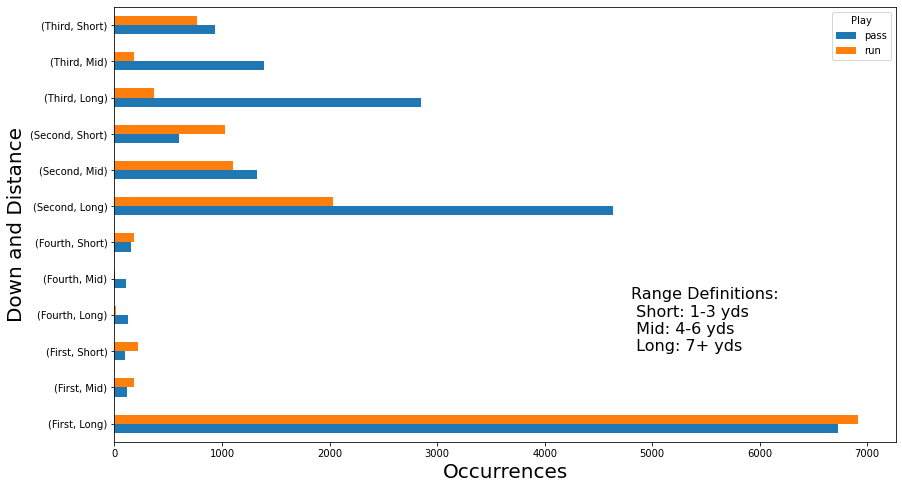

In [211]:
# plot play type grouped by down and distance range
ax = pbp.groupby(['Down', 'Range'])['Play'].value_counts().unstack().plot.barh(figsize = (14,8))
plt.xlabel('Occurrences', fontsize = 20)
plt.ylabel('Down and Distance', fontsize = 20)
#plt.title('Play Calls by Down and Distance', fontsize = 22)
plt.text(4800,2, 'Range Definitions: \n Short: 1-3 yds \n Mid: 4-6 yds \n Long: 7+ yds', size = 16)

Text(75, 5, 'Range Definitions: \n Short: 1-3 yds \n Mid: 4-6 yds \n Long: 7+ yds')

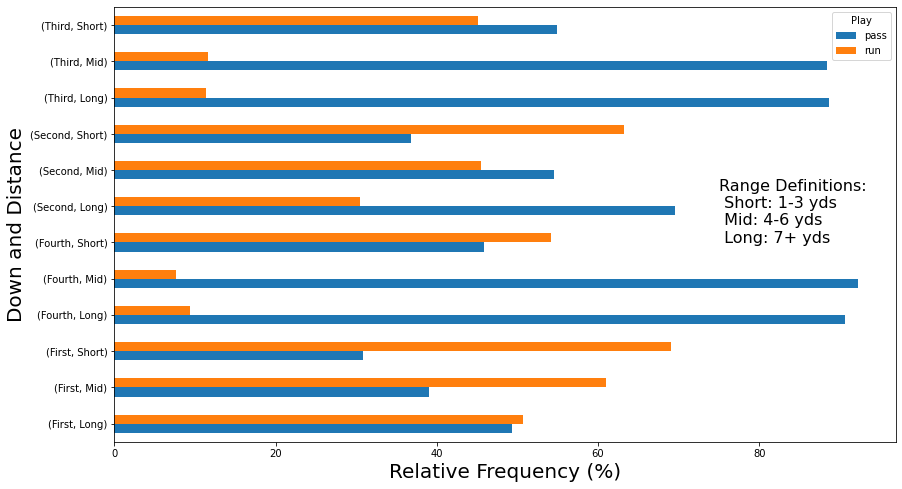

In [212]:
# plot play type relative frequency grouped by down and distance range
ax = pbp.groupby(['Down', 'Range'])['Play'].value_counts(normalize = True).mul(100).unstack().plot.barh(figsize = (14,8))
plt.xlabel('Relative Frequency (%)', fontsize = 20)
plt.ylabel('Down and Distance', fontsize = 20)
plt.text(75,5,'Range Definitions: \n Short: 1-3 yds \n Mid: 4-6 yds \n Long: 7+ yds', size = 16)

## Play Calls by Time Remaining and Score Differential

Text(25.818243258477644, 0.5, 'Seconds Remaining')

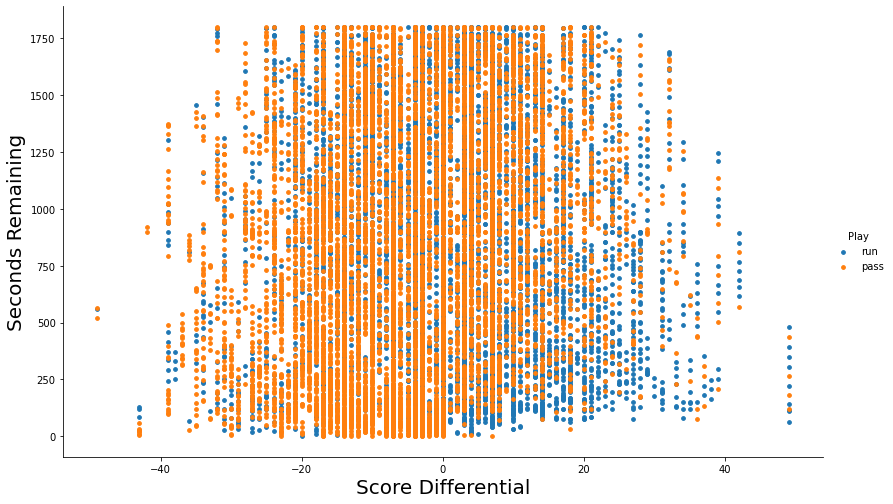

In [220]:
fg = sns.FacetGrid(data = pbp[pbp['half1'] == 0], hue = 'Play', height = 7, aspect = 1.65)
fg.map(plt.scatter, 'score_differential', 'half_seconds_remaining', s = 14).add_legend()
fg.axes[0,0].set_xlabel('Score Differential', size = 20)
fg.axes[0,0].set_ylabel('Seconds Remaining', size = 20)

## Play Calls by Formation and Huddle

In [214]:
# define function for readable lables on formation type
def shotgun_grps(obs):
    if obs['shotgun'] == 1:         
        grp = 'Shotgun'
    else:
        grp = 'Under Center'

    return grp 

# define function for readable lables on huddle type
def huddle_grps(obs):
    if obs['no_huddle'] == 1:         
        grp = 'Hurry Up'
    else:
        grp = 'Huddle'
        
    return grp 

In [215]:
pbp['Formation'] = pbp.apply(shotgun_grps, axis = 1)
pbp['Huddle'] = pbp.apply(huddle_grps, axis = 1)

Text(0, 0.5, 'Occurrences')

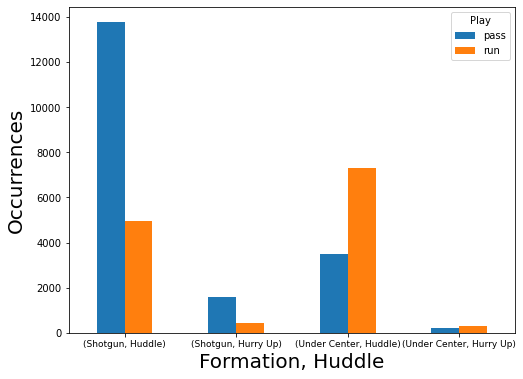

In [216]:
# plot play type grouped by shotgun and no huddle
ax = pbp.groupby(['Formation', 'Huddle'])['Play'].value_counts().unstack().plot.bar(figsize = (8,6))
plt.xlabel('Formation, Huddle', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 9)
plt.ylabel('Occurrences', fontsize = 20)

Text(0, 0.5, 'Relative Frequency (%)')

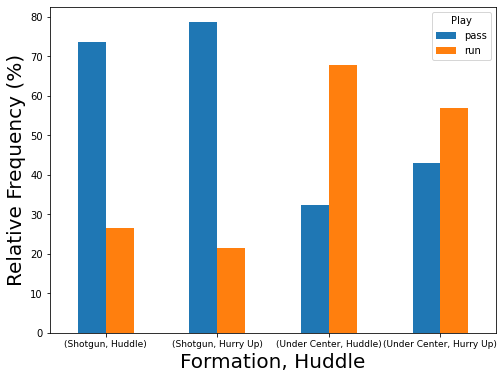

In [218]:
# plot play type relative frequency grouped by shotgun and no huddle
ax = pbp.groupby(['Formation', 'Huddle'])['Play'].value_counts(normalize = True).mul(100).unstack().plot.bar(figsize = (8,6))
plt.xlabel('Formation, Huddle', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 9)
plt.ylabel('Relative Frequency (%)', fontsize = 20)

## Team Tendencies

In [252]:
# Divisions (cross conference)
west = ['ARI', 'SEA', 'SF', 'LA', 'DEN', 'LAC', 'LV', 'KC']
north = ['GB', 'DET', 'CHI', 'MIN', 'BAL', 'CIN', 'PIT', 'CLE']
east = ['NYG', 'PHI', 'DAL', 'WAS', 'NE', 'MIA', 'NYJ', 'BUF']
south = ['ATL', 'CAR', 'NO', 'TB', 'HOU', 'TEN', 'JAX', 'IND']

# Seperate teams by division
west_teams = pbp[pbp['posteam'].isin(west)]
north_teams = pbp[pbp['posteam'].isin(north)]
east_teams = pbp[pbp['posteam'].isin(east)]
south_teams = pbp[pbp['posteam'].isin(south)]

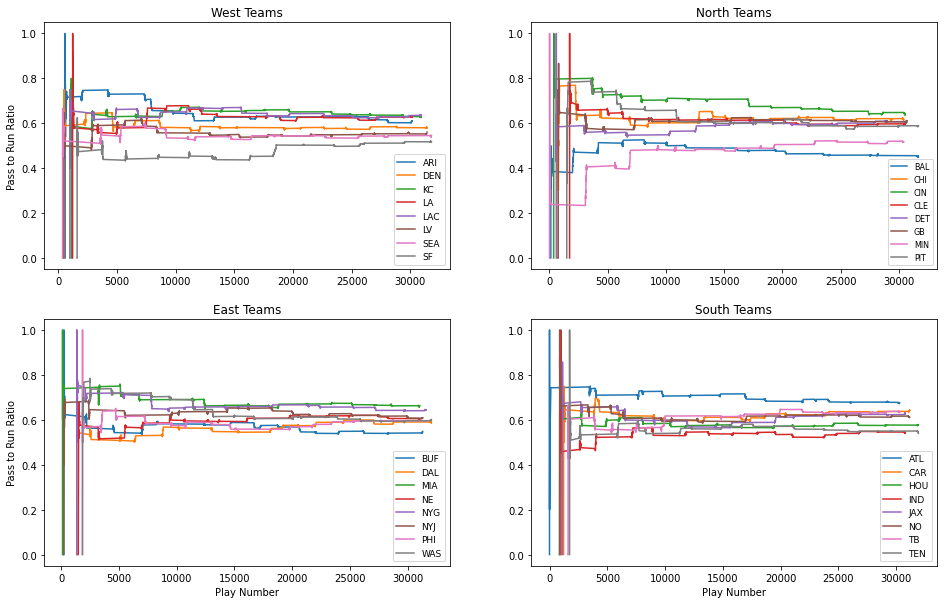

In [289]:
fig, axes = plt.subplots(2,2, figsize = (16,10))
west_teams.groupby('posteam')['ptr_ratio'].plot(ax = axes[0,0])
north_teams.groupby('posteam')['ptr_ratio'].plot(ax = axes[0,1])
east_teams.groupby('posteam')['ptr_ratio'].plot(ax = axes[1,0])
south_teams.groupby('posteam')['ptr_ratio'].plot(ax = axes[1,1])
axes[0,0].set_title('West Teams')
axes[0,0].legend(fontsize = 9, loc = 4)
axes[0,0].set_ylabel('Pass to Run Ratio')
axes[1,0].set_title('East Teams')
axes[1,0].legend(fontsize = 9, loc = 4)
axes[1,0].set_xlabel('Play Number')
axes[1,0].set_ylabel('Pass to Run Ratio')
axes[0,1].set_title('North Teams')
axes[0,1].legend(fontsize = 8, loc = 4)
axes[1,1].set_title('South Teams')
axes[1,1].legend(fontsize = 9, loc = 4)
axes[1,1].set_xlabel('Play Number')
plt.show()

In [117]:
pbp.columns

Index(['play_id', 'game_id', 'posteam', 'defteam', 'yardline_100',
       'half_seconds_remaining', 'ydstogo', 'shotgun', 'no_huddle',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'score_differential', 'temp', 'wind', 'posteam_home', 'frst_d',
       'scnd_d', 'thrd_d', 'frth_d', 'half1', 'dome', 'outdoors', 'closed',
       'open', 'pass', 'posteamATL', 'posteamBAL', 'posteamBUF', 'posteamCAR',
       'posteamCHI', 'posteamCIN', 'posteamCLE', 'posteamDAL', 'posteamDEN',
       'posteamDET', 'posteamGB', 'posteamHOU', 'posteamIND', 'posteamJAX',
       'posteamKC', 'posteamLA', 'posteamLAC', 'posteamLV', 'posteamMIA',
       'posteamMIN', 'posteamNE', 'posteamNO', 'posteamNYG', 'posteamNYJ',
       'posteamPHI', 'posteamPIT', 'posteamSEA', 'posteamSF', 'posteamTB',
       'posteamTEN', 'posteamWAS', 'defteamATL', 'defteamBAL', 'defteamBUF',
       'defteamCAR', 'defteamCHI', 'defteamCIN', 'defteamCLE', 'defteamDAL',
       'defteamDEN', 'defteamDET', 'defte

In [315]:
qr = pbp.query('half1 == 0 & score_differential >= 0 & half_seconds_remaining < 250')

In [316]:
qr

,play_id,game_id,posteam,defteam,yardline_100,half_seconds_remaining,ydstogo,shotgun,no_huddle,posteam_timeouts_remaining,...,cum_pass_yds,cum_run_yds,ptr_ratio,cum_pass_yds_all,cum_run_yds_all,Range,Play,Down,Formation,Huddle
225,3736,2019_01_BAL_MIA,BAL,MIA,51,223,10,1,0,2,...,5.593750,3.765625,0.390625,5.593750,3.765625,Long,run,First,Shotgun,Huddle
226,3757,2019_01_BAL_MIA,BAL,MIA,47,183,6,1,0,2,...,5.507692,3.769231,0.384615,5.507692,3.769231,Mid,pass,Second,Shotgun,Huddle
227,3781,2019_01_BAL_MIA,BAL,MIA,35,144,10,1,0,2,...,5.606061,3.712121,0.393939,5.606061,3.712121,Long,run,First,Shotgun,Huddle
228,3819,2019_01_BAL_MIA,BAL,MIA,30,120,5,1,0,2,...,5.522388,3.731343,0.388060,5.522388,3.731343,Mid,pass,Second,Shotgun,Huddle
229,3860,2019_01_BAL_MIA,BAL,MIA,22,115,10,1,0,2,...,5.558824,3.676471,0.397059,5.558824,3.676471,Long,run,First,Shotgun,Huddle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31908,3550,2019_17_TEN_HOU,TEN,HOU,57,191,10,0,0,3,...,3.876623,2.362554,0.540043,4.263210,1.884347,Long,run,First,Under Center,Huddle
31909,3588,2019_17_TEN_HOU,TEN,HOU,53,184,6,0,0,3,...,3.872432,2.364324,0.539459,4.258964,1.886454,Mid,run,Second,Under Center,Huddle
32041,4105,2019_17_WAS_DAL,DAL,WAS,23,219,10,0,0,2,...,4.502370,2.050237,0.584834,3.598870,2.215631,Long,run,First,Under Center,Huddle
32042,4126,2019_17_WAS_DAL,DAL,WAS,23,176,10,0,0,2,...,4.498106,2.048295,0.584280,3.595484,2.213547,Long,pass,Second,Under Center,Huddle


In [317]:
passes = qr[qr['pass'] == 1]
runs = qr[qr['Play'] == 'run']

In [318]:
passes

,play_id,game_id,posteam,defteam,yardline_100,half_seconds_remaining,ydstogo,shotgun,no_huddle,posteam_timeouts_remaining,...,cum_pass_yds,cum_run_yds,ptr_ratio,cum_pass_yds_all,cum_run_yds_all,Range,Play,Down,Formation,Huddle
226,3757,2019_01_BAL_MIA,BAL,MIA,47,183,6,1,0,2,...,5.507692,3.769231,0.384615,5.507692,3.769231,Mid,pass,Second,Shotgun,Huddle
228,3819,2019_01_BAL_MIA,BAL,MIA,30,120,5,1,0,2,...,5.522388,3.731343,0.388060,5.522388,3.731343,Mid,pass,Second,Shotgun,Huddle
585,3645,2019_01_DEN_OAK,LV,DEN,73,120,8,0,0,2,...,4.882353,1.686275,0.490196,4.882353,1.686275,Long,pass,Third,Under Center,Huddle
707,4444,2019_01_DET_ARI,DET,ARI,51,167,5,1,0,2,...,4.758065,1.612903,0.532258,4.758065,1.612903,Mid,pass,Third,Shotgun,Huddle
717,4863,2019_01_DET_ARI,DET,ARI,75,43,10,1,0,0,...,4.682540,1.587302,0.539683,4.682540,1.587302,Long,pass,First,Shotgun,Huddle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31400,3776,2019_17_OAK_DEN,DEN,LV,80,185,15,0,0,1,...,3.324440,1.767343,0.579509,4.355249,1.661718,Long,pass,Second,Under Center,Huddle
31675,3786,2019_17_PIT_BAL,BAL,PIT,45,30,6,1,0,0,...,3.112934,3.206564,0.448842,3.048972,1.724780,Mid,pass,Fourth,Shotgun,Huddle
31779,3495,2019_17_SF_SEA,SF,SEA,86,163,17,1,0,2,...,3.817998,2.347826,0.516684,4.207000,1.890000,Long,pass,Third,Shotgun,Huddle
32042,4126,2019_17_WAS_DAL,DAL,WAS,23,176,10,0,0,2,...,4.498106,2.048295,0.584280,3.595484,2.213547,Long,pass,Second,Under Center,Huddle


In [319]:
runs

,play_id,game_id,posteam,defteam,yardline_100,half_seconds_remaining,ydstogo,shotgun,no_huddle,posteam_timeouts_remaining,...,cum_pass_yds,cum_run_yds,ptr_ratio,cum_pass_yds_all,cum_run_yds_all,Range,Play,Down,Formation,Huddle
225,3736,2019_01_BAL_MIA,BAL,MIA,51,223,10,1,0,2,...,5.593750,3.765625,0.390625,5.593750,3.765625,Long,run,First,Shotgun,Huddle
227,3781,2019_01_BAL_MIA,BAL,MIA,35,144,10,1,0,2,...,5.606061,3.712121,0.393939,5.606061,3.712121,Long,run,First,Shotgun,Huddle
229,3860,2019_01_BAL_MIA,BAL,MIA,22,115,10,1,0,2,...,5.558824,3.676471,0.397059,5.558824,3.676471,Long,run,First,Shotgun,Huddle
230,3881,2019_01_BAL_MIA,BAL,MIA,19,110,7,1,0,2,...,5.478261,3.666667,0.391304,5.478261,3.666667,Long,run,Second,Shotgun,Huddle
231,3902,2019_01_BAL_MIA,BAL,MIA,9,65,9,1,0,2,...,5.400000,3.757143,0.385714,5.400000,3.757143,Long,run,First,Shotgun,Huddle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31906,3480,2019_17_TEN_HOU,TEN,HOU,85,206,10,0,0,3,...,3.885033,2.337310,0.541215,4.271728,1.860140,Long,run,First,Under Center,Huddle
31907,3518,2019_17_TEN_HOU,TEN,HOU,80,198,5,0,0,3,...,3.880823,2.340195,0.540628,4.267465,1.863273,Mid,run,Second,Under Center,Huddle
31908,3550,2019_17_TEN_HOU,TEN,HOU,57,191,10,0,0,3,...,3.876623,2.362554,0.540043,4.263210,1.884347,Long,run,First,Under Center,Huddle
31909,3588,2019_17_TEN_HOU,TEN,HOU,53,184,6,0,0,3,...,3.872432,2.364324,0.539459,4.258964,1.886454,Mid,run,Second,Under Center,Huddle
